# Datojen haku ja esikäsittely

In [1]:
from set_path import set_path
mainpath, path = set_path('areadata')

In [2]:
from read_and_prepare_data import read_and_prepare_data
stat, post, kunta_stat, vaalidata = read_and_prepare_data(path)

read_and_prepare_data  read from start
read_post_muncipalities  read from file
read_stats_postcode  read from file
read_ravintolat_ja_kaupat  read from file
read_kiinteisto  read from file
read_vaalit  read from file


In [3]:
from selected_cols import selected_cols
numeric_features, categorical_features = selected_cols(largeset=False, parties=True)

In [14]:
from sklearn.feature_selection import  mutual_info_classif
import pandas as pd
import numpy as np
from draw_and_create_clusters import create_kmeans_clusters 

from prepare_and_scale_data import prepare_and_scale_data
from create_prediction import select_kbest
from select_columns_and_clean_data import select_columns_and_clean_data
from draw_all import draw_features
from create_dbscan_clusters import create_dbscan_clusters


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_colwidth = 100

#valitaan käsittelyyn tuleva alue 91 = Helsinki
selected = stat[(stat['muncipality_code']==91) | (stat['muncipality_code']==92) | (stat['muncipality_code']==49) | (stat['muncipality_code']==235)].copy()
selected_vaalidata = vaalidata[(vaalidata['Kuntanumero']==91) | (vaalidata['Kuntanumero']==92) | (vaalidata['Kuntanumero']==49) | (vaalidata['Kuntanumero']==235) ].copy()
post_included = post[(post['muncipality_code']==91) | (post['muncipality_code']==92) | (post['muncipality_code']==49) | (post['muncipality_code']==235)]['postcode'].copy()

#valitaan käsittelyyn tuleva alue FI1B1 = Uusimaa
selected = stat[stat['area_code']=='FI1B1'].copy()
selected_vaalidata = vaalidata[vaalidata['area_code']=='FI1B1'].copy()
post_included = post[post['area_code']=='FI1B1'].copy()


selected = stat.copy()
selected_vaalidata = vaalidata.copy()
post_included = post.copy()

data, X_scale, X = prepare_and_scale_data(selected, pd.DataFrame(), numeric_features, categorical_features)



In [ ]:
for min_samples in range(6, 15, 1):
    for eps in np.arange(1.1, 1.6, 0.1):
        db, data = create_dbscan_clusters(data, X, eps, min_samples, silhouette_print=0.1)

In [40]:
db, data = create_dbscan_clusters(data, X, 1.4, 5, silhouette_print=0.1)
print(data['cluster'].value_counts())

EPS: 1.40 Min samples: 5  Number of clusters: 5  Number of noise clusters: 209 Silhouette Coefficient: 0.180 Calinski Harabaz Index: 116
 1    2258
 0     385
-1     209
 4      62
 2      36
 3      20
Name: cluster, dtype: int64


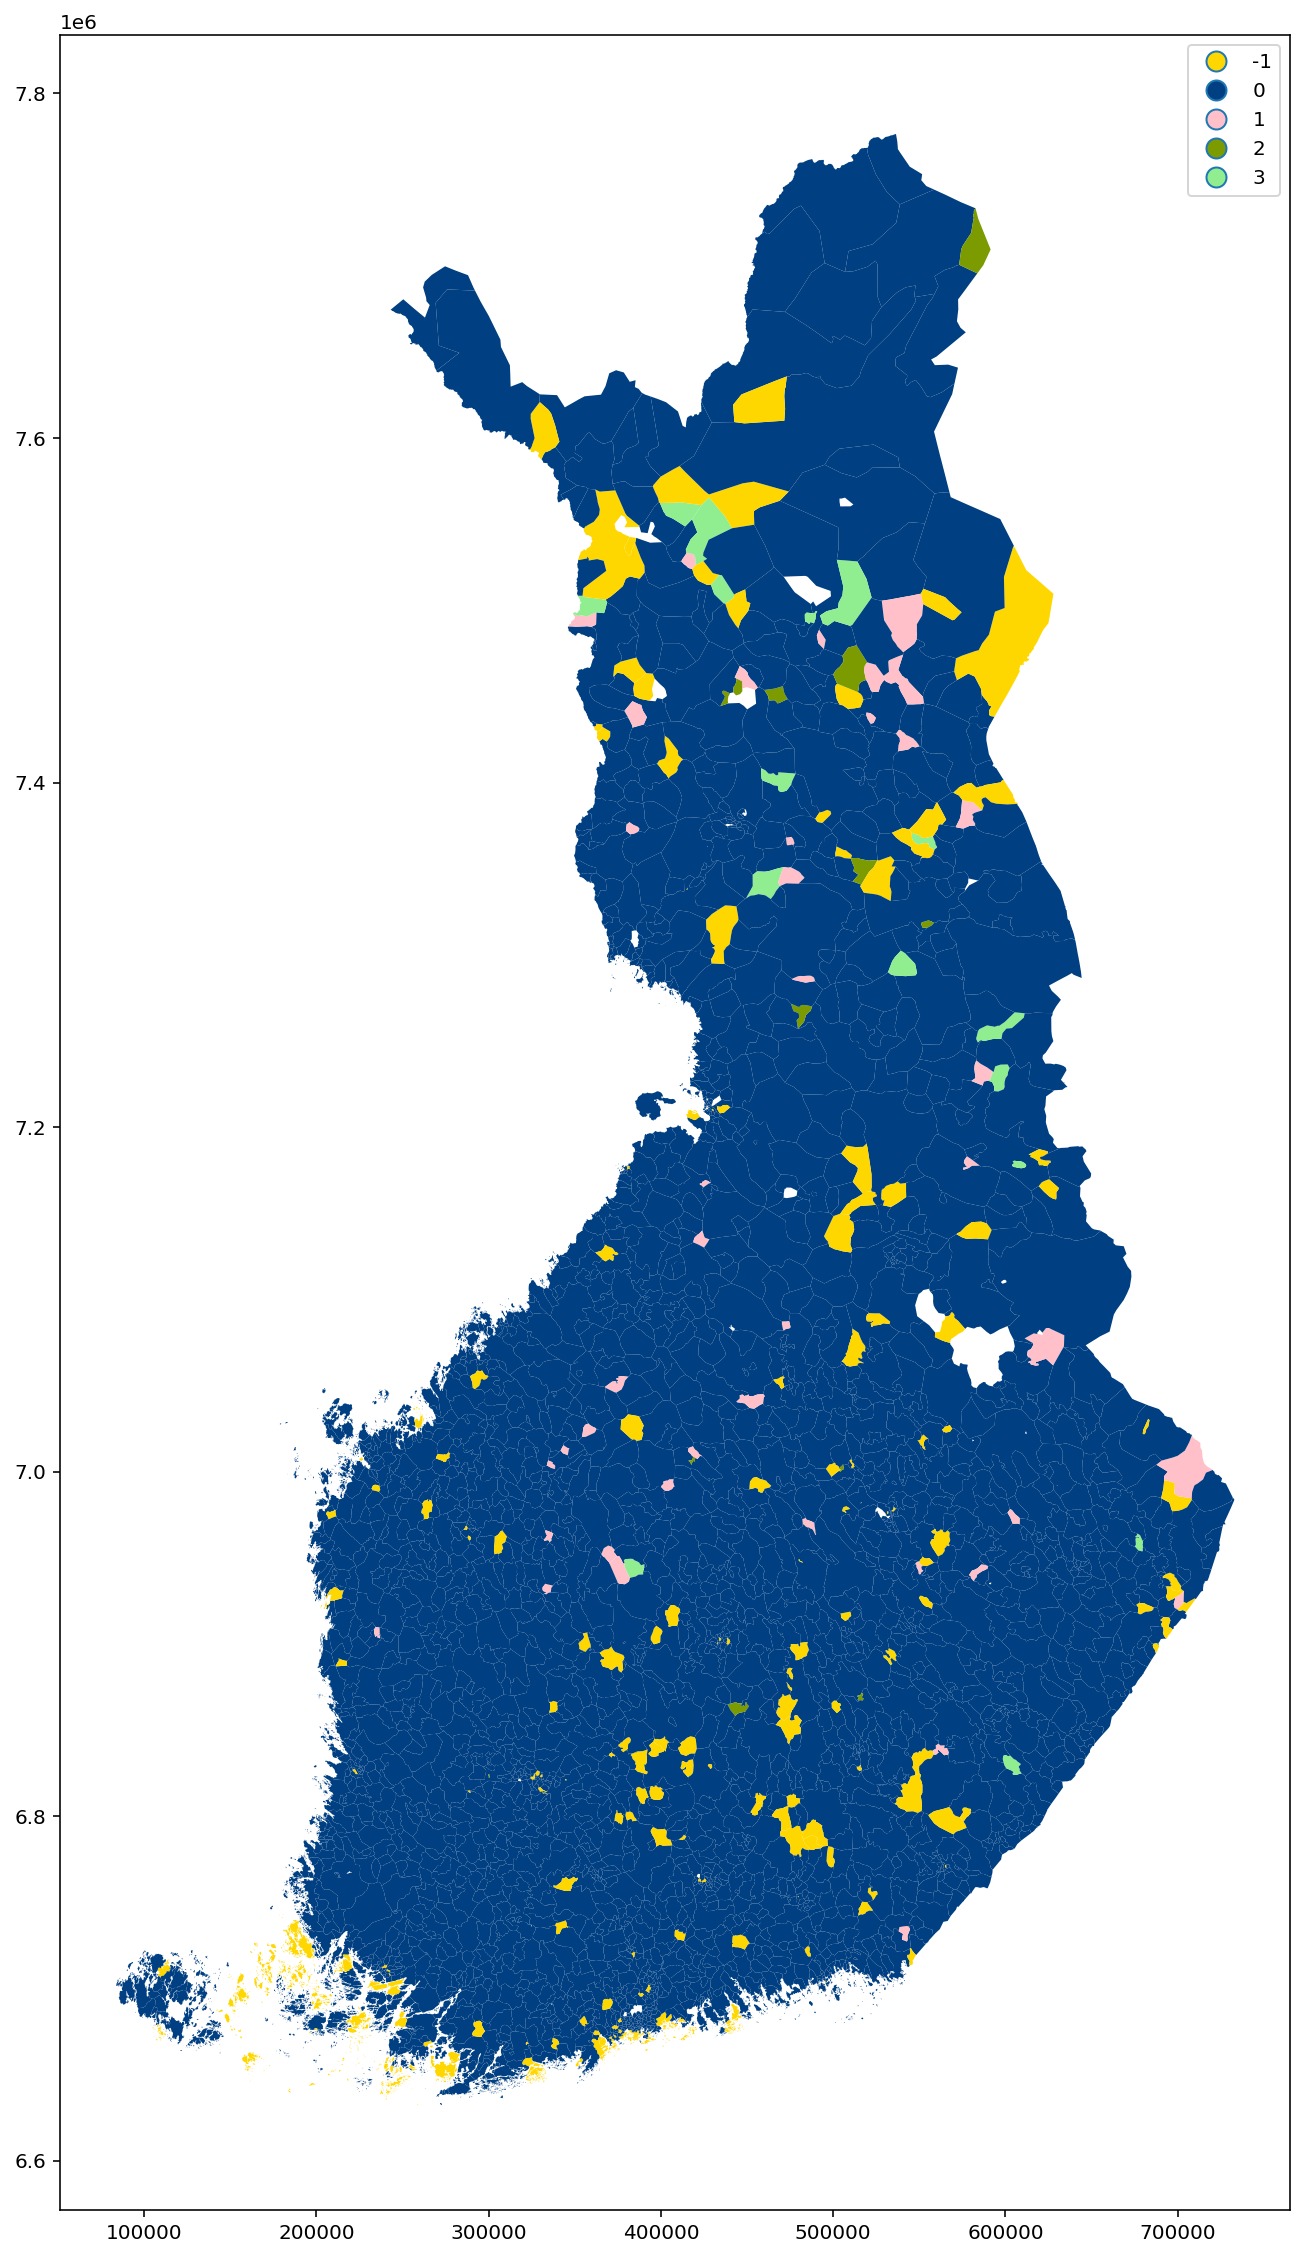

In [33]:
import geopandas
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('my cmap', ['gold', 'green', 'blue', 'pink', 'gold', 'darkgreen', 'lightgreen'])
draw = geopandas.GeoDataFrame(pd.DataFrame(data[['cluster', 'geometry']], dtype=object),geometry='geometry')
draw.plot(column='cluster', cmap=cmap, legend=True, figsize=(20,20))